Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

In [24]:
import sklearn
from packaging import version
assert version.parse(sklearn.__version__) <= version.parse('1.2')

In [25]:
import mglearn
import matplotlib.pyplot as plt

In [26]:
import sys

In [27]:
sys.path

['d:\\DS_Works\\Introduction-to-Machine-Learning-with-Python\\Codes',
 'd:\\Python\\python310.zip',
 'd:\\Python\\DLLs',
 'd:\\Python\\lib',
 'd:\\Python',
 '',
 'C:\\Users\\JPL-JUNO\\AppData\\Roaming\\Python\\Python310\\site-packages',
 'd:\\Python\\lib\\site-packages',
 'd:\\Python\\lib\\site-packages\\win32',
 'd:\\Python\\lib\\site-packages\\win32\\lib',
 'd:\\Python\\lib\\site-packages\\Pythonwin']

In [28]:
import mglearn

# 监督学习

## 分类与回归

## 监督学习算法

### 一些样本数据集

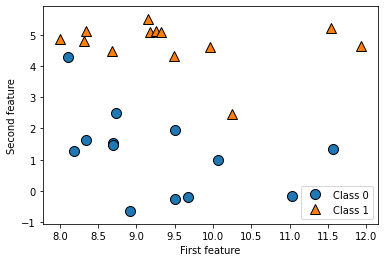

In [29]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.show()

In [30]:
print('X.shape: {}'.format(X.shape))

X.shape: (26, 2)


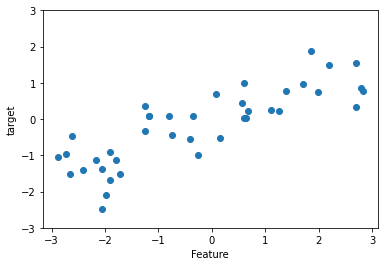

In [31]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('target')
plt.show()

In [32]:
print('X.shape: {}'.format(X.shape))

X.shape: (40, 1)


In [33]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('cancer.keys(): \n{}'.format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [34]:
import numpy as np

In [35]:
print('Shape of cancer data: {}'.format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [36]:
print('Sample counts per class : \n{}'.format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}
))

Sample counts per class : 
{'malignant': 212, 'benign': 357}


In [37]:
print('Feature names: \n{}'.format(cancer.feature_names))

Feature names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [38]:
from sklearn.datasets import load_boston
boston = load_boston()
print('Data shape: {}'.format(boston.data.shape))

Data shape: (506, 13)


d:\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`

In [39]:
X, y = mglearn.datasets.load_extended_boston()
print('X.shape: {}'.format(X.shape))

X.shape: (506, 104)


### k近邻

#### k近邻分类

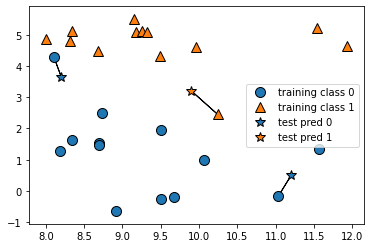

In [40]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

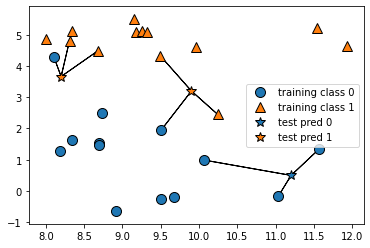

In [41]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [42]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print('Test set predictions: {}'.format(clf.predict(X_test)))

Test set predictions: [1 1 1 1 0 1 0]


In [44]:
print('Test set accuracy: {:.2f}'.format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


#### 分析KNeighborsClassifier

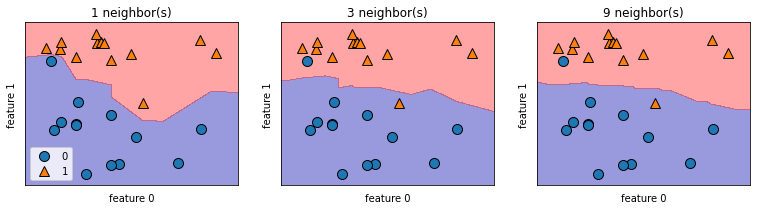

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(13, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('{} neighbor(s)'.format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend(loc=3)
plt.show()

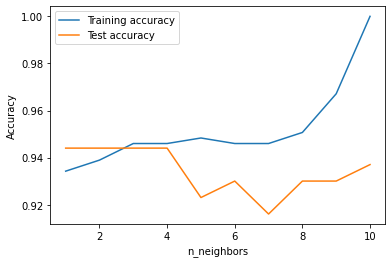

In [54]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify=cancer.target, 
                                                    random_state=42)
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
   
neighbors_settings = list(neighbors_settings)
training_accuracy.reverse()
test_accuracy.reverse() 
plt.plot(neighbors_settings, training_accuracy, label='Training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='Test accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### k近邻回归

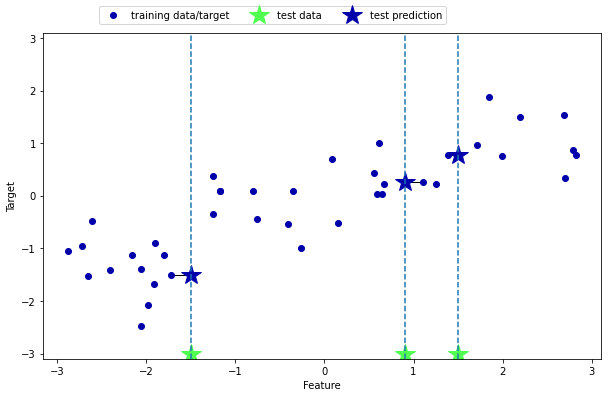

In [56]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

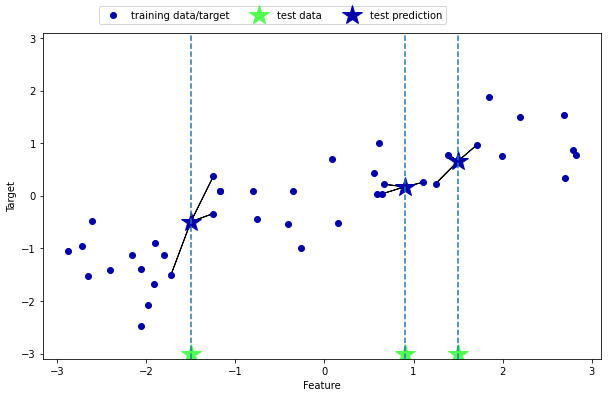

In [57]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [69]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [70]:
print('Test set predictions: \n{}'.format(reg.predict(X_test)))

Test set predictions: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [71]:
print('Test set R^2: {:.2f}'.format(reg.score(X_test, y_test)))

Test set R^2: 0.83


#### 分析KNeighborsRegressor

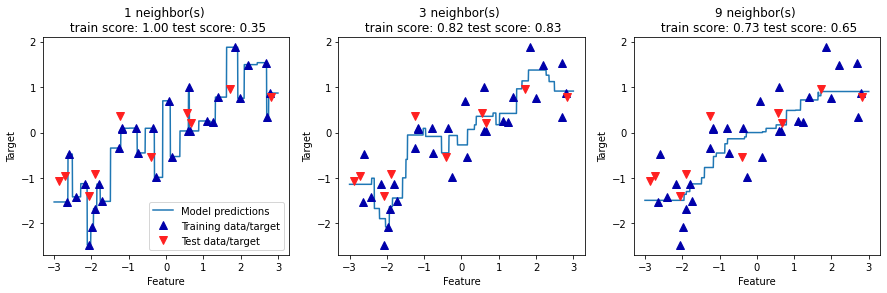

In [78]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s) \n train score: {:.2f} test score: {:.2f}".format(n_neighbors, 
                                                                                   reg.score(X_train, y_train), 
                                                                                   reg.score(X_test, y_test)))
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
axes[0].legend(['Model predictions', 'Training data/target', 'Test data/target'], loc='best')
plt.show()

### 线性模型

#### 用于回归的线性模型

w[0]: 0.393906  b: -0.031804


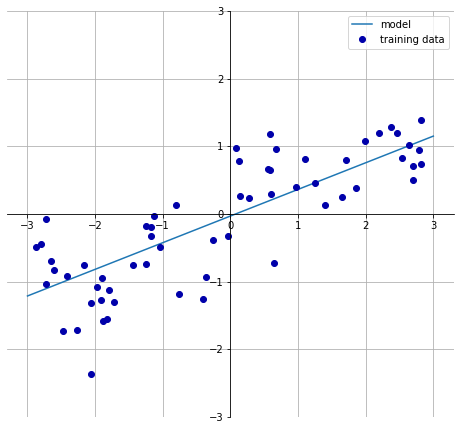

In [79]:
mglearn.plots.plot_linear_regression_wave()

#### 线性回归（又名普通最小二乘法）

In [80]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [82]:
print('lr.coef_: {}'.format(lr.coef_))
print('lr.intercept_: {}'.format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [84]:
print('Training set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Training set score: {:.2f}'.format(lr.score(X_test, y_test)))

Training set score: 0.67
Training set score: 0.66


In [85]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

d:\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`

In [86]:
print('Training set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Training set score: {:.2f}'.format(lr.score(X_test, y_test)))
# Training set score: 0.95
# Training set score: 0.61

Training set score: 0.95
Training set score: 0.61


#### 岭回归

In [88]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge.score(X_train, y_train)))
print('Training set score: {:.2f}'.format(ridge.score(X_test, y_test)))
# Training set score: 0.89
# Training set score: 0.75

Training set score: 0.89
Training set score: 0.75


In [90]:
from sklearn.linear_model import Ridge
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge10.score(X_train, y_train)))
print('Training set score: {:.2f}'.format(ridge10.score(X_test, y_test)))
# Training set score: 0.79
# Training set score: 0.64

Training set score: 0.79
Training set score: 0.64


In [89]:
from sklearn.linear_model import Ridge
ridge01 = Ridge(alpha=.1).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge01.score(X_train, y_train)))
print('Training set score: {:.2f}'.format(ridge01.score(X_test, y_test)))
# Training set score: 0.93
# Training set score: 0.77

Training set score: 0.93
Training set score: 0.77


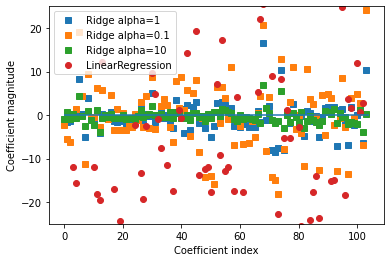

In [97]:
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge01.coef_, 's', label='Ridge alpha=0.1')
plt.plot(ridge10.coef_, 's', label='Ridge alpha=10')
plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()